In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Import the Dataset

Import the train data set.

In [2]:
import io
import pandas as pd
import numpy as np

df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print('Dimensions of the Train dataset(Rows, Columns): ', df_train.shape)

Dimensions of the Train dataset(Rows, Columns):  (891, 12)


Import the test data set.

In [4]:
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print('Dimensions of the Test dataset(Rows, Columns): ', df_test.shape)

Dimensions of the Test dataset(Rows, Columns):  (418, 11)


Let's add a dummy column to test dataset and combine the train and test data to perform exploratory data analysis. 
> This is to avoid the scenario, where some of the class variables present in other dataset not accounted for training.

In [6]:
df_test['Survived'] = 'test'
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,test
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,test
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,test


- Let's combine the Train and Test Data set's to ensure that 

In [7]:
combined_df = pd.concat([df_train, df_test], axis=0)
combined_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,test,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,test,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,test,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,test,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,test,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [8]:
print('Dimensions of the combined dataset(Rows, Columns): ', combined_df.shape)

Dimensions of the combined dataset(Rows, Columns):  (1309, 12)


## Exploratory Data Analysis

In [9]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   object 
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


In [10]:
combined_df.groupby(['Sex', 'Pclass'])['Age', 'Fare'].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Age        Fare
Sex    Pclass                       
female 1       37.037594  109.412385
       2       27.499223   23.234827
       3       22.185329   15.324250
male   1       41.029272   69.888385
       2       30.815380   19.904946
       3       25.962264   12.415462

In [11]:
combined_df.groupby(['Sex', 'Embarked'])['Age', 'Fare'].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Age       Fare
Sex    Embarked                      
female C         31.224490  81.128540
       Q         25.458333  12.550837
       S         27.877235  39.339305
male   C         33.284386  48.810619
       Q         31.557692  12.273941
       S         29.942394  21.841878

## Checking for Missing Values

In [12]:
combined_df.isna().any().value_counts()

False    8
True     4
dtype: int64

In [13]:
round(combined_df.isnull().sum().sort_values(ascending=False)*100/len(combined_df), 2)

Cabin          77.46
Age            20.09
Embarked        0.15
Fare            0.08
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
dtype: float64

In [14]:
combined_df.drop('Cabin', axis='columns', inplace=True)

combined_df['Embarked'] = combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0])

combined_df['Age'] = combined_df['Age'].fillna(combined_df['Age'].mean())
combined_df['Fare'] = combined_df['Fare'].fillna(combined_df['Fare'].mean())

combined_df.isna().any().value_counts()

False    11
dtype: int64

In [15]:
for column in combined_df.columns:
    print('Number of unique values in column, {} = '.format(column), combined_df[column].nunique())

Number of unique values in column, PassengerId =  1309
Number of unique values in column, Survived =  3
Number of unique values in column, Pclass =  3
Number of unique values in column, Name =  1307
Number of unique values in column, Sex =  2
Number of unique values in column, Age =  99
Number of unique values in column, SibSp =  7
Number of unique values in column, Parch =  8
Number of unique values in column, Ticket =  929
Number of unique values in column, Fare =  282
Number of unique values in column, Embarked =  3


- The columns 'Pclass', 'SibSp', 'Parch' are categorical classes.
- PassengerId is also a key column that cannot be used for inferring statistics of the data.
- There are only two features or columns with numeric and continuous values. Namely 'Age' and 'Fare'.

In [16]:
combined_df[['Age', 'Fare']].describe()

,Age,Fare
count,1309.000000,1309.000000
mean,29.881138,33.295479
std,12.883193,51.738879
min,0.170000,0.000000
25%,22.000000,7.895800
50%,29.881138,14.454200
75%,35.000000,31.275000
max,80.000000,512.329200


## Univariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

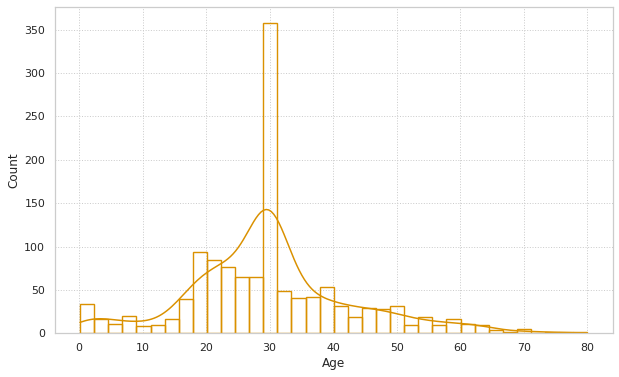

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid', {"grid.color": ".8", "grid.linestyle": ":"})
sns.set_context("notebook")

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.facecolor'] = '#00000000'

sns.histplot(combined_df["Age"],
             bins=36, 
             kde=True, color='#da9100', 
             fill=False, 
             legend=True)

- we can see the distribution of 'Age' variable.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

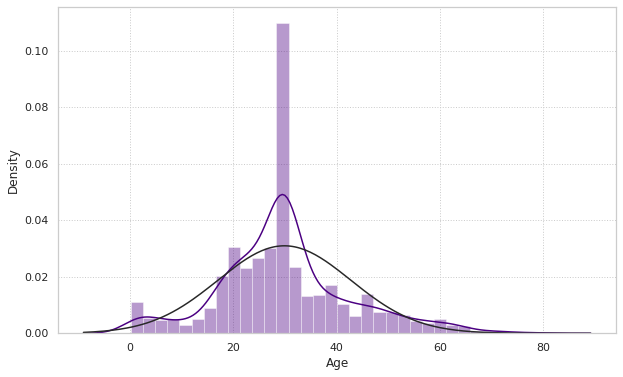

In [18]:
from scipy import stats
from scipy.stats import norm

sns.distplot(combined_df['Age'], 
             fit=norm, 
             color='#4b0082')

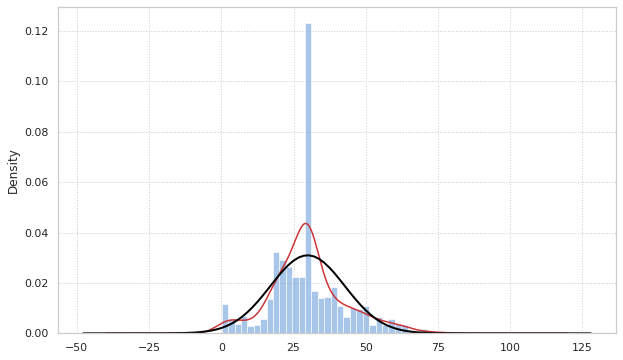

In [19]:
data = combined_df['Age']
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=36, 
         density=True, 
         alpha=0.6, 
         color='#6ca0dc')

data.plot.kde(bw_method=0.3, 
              color='#cc3336')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

-We can observe how the distribution of 'Age' deviates from an ideal Normal curve.

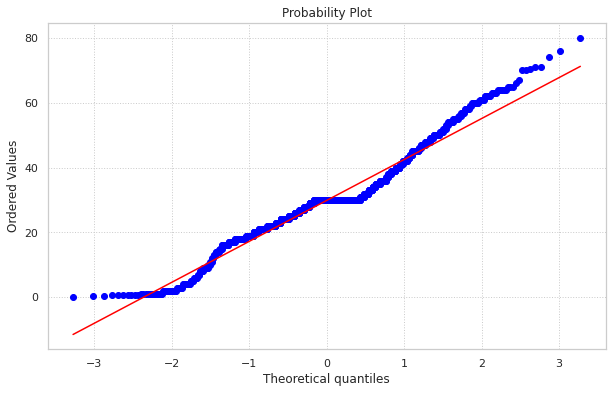

In [20]:
res = stats.probplot(combined_df['Age'], plot=plt)

|Measure|Value|Inference|Suggested Resolution|
|---|---|---|---|
|Skewness|Positive|Peak of curve on left side|Logarithmic transformation or Square root transform|
|Skewness|Negative|Peak of curve on right side|Exponential transformation or Power transform|
|Skewness|Zero|Normal distribution|-|
|Kurtosis|Positive(>3)|Narrow and tall peak|-|
|Kurtosis|Negative(<3)|Wide and flat peak|-|
|Kurtosis|Zero(=3)|Normal distribution|-|

In [21]:
print("Skewness of Age column: ", combined_df['Age'].skew())
print("Kurtosis of Age column: ", combined_df['Age'].kurtosis())

Skewness of Age column:  0.4559237444008716
Kurtosis of Age column:  0.9383083564475463


<AxesSubplot:xlabel='Fare', ylabel='Count'>

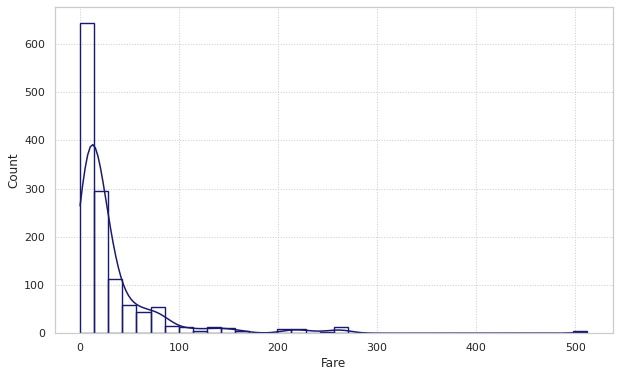

In [22]:
sns.histplot(combined_df["Fare"],
             bins=36, 
             kde=True, 
             color='#191970', 
             fill=False)

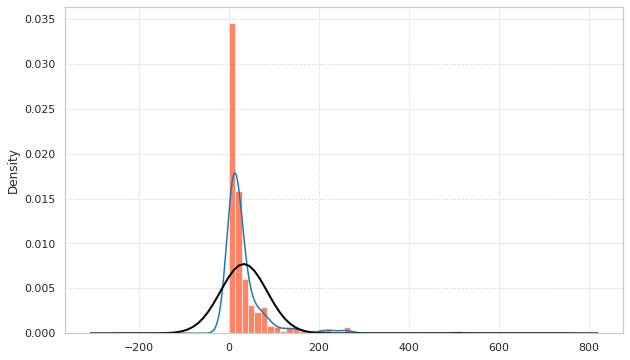

In [23]:
data = combined_df['Fare']
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, 
         bins=36, 
         density=True, 
         alpha=0.6, 
         color='#FF3300')

data.plot.kde(bw_method=0.3)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

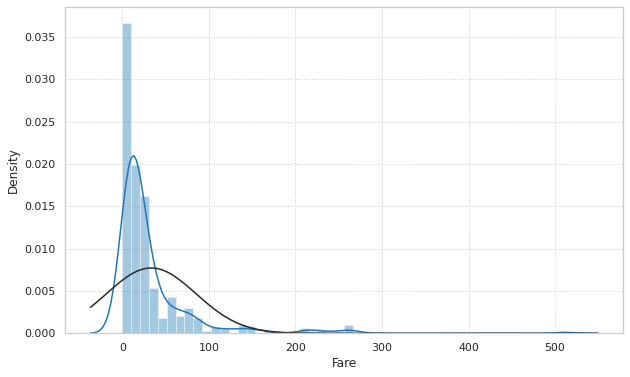

In [24]:
sns.distplot(combined_df['Fare'], fit=norm)

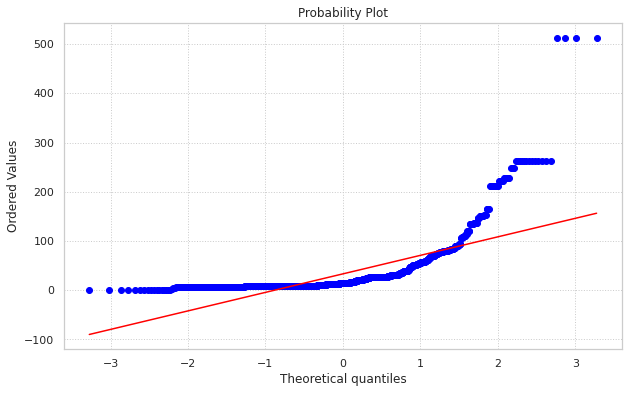

In [25]:
res = stats.probplot(combined_df['Fare'], plot=plt)

In [26]:
print("Skewness of Fare column: ", combined_df['Fare'].skew())
print("Kurtosis of Fare column: ", combined_df['Fare'].kurtosis())

Skewness of Fare column:  4.369374593951007
Kurtosis of Fare column:  27.05086615808882


In [27]:
combined_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<AxesSubplot:ylabel='Survived'>

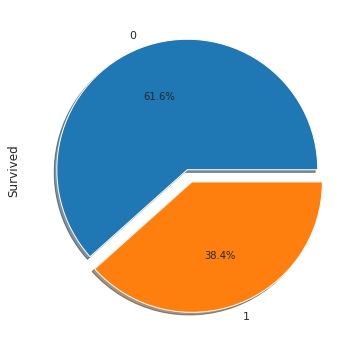

In [28]:
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True)

,Count,%
0,549,61.62
1,342,38.38


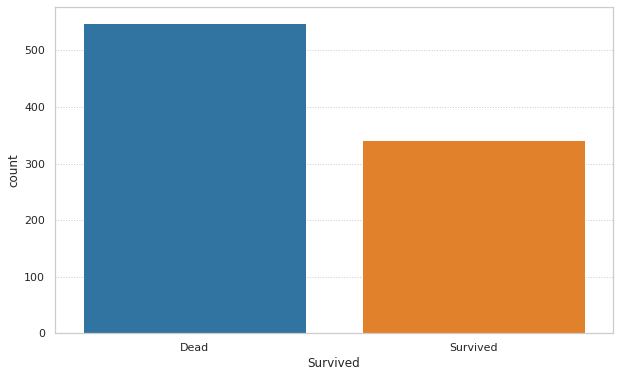

In [29]:
g = sns.countplot(data=df_train, x='Survived')
g.set_xticklabels(['Dead', 'Survived'])

comp_survival = pd.DataFrame(columns=[['Count', '%']])
comp_survival['Count'] = df_train['Survived'].value_counts()
comp_survival['%'] = round(df_train['Survived'].value_counts()*100/len(df_train), 2)
                             
comp_survival

,Count,%
3,491,55.11
1,216,24.24
2,184,20.65


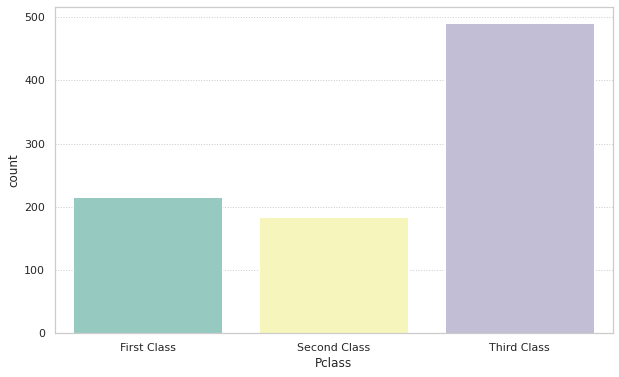

In [30]:
g = sns.countplot(data=df_train, x='Pclass', palette='Set3')
g.set_xticklabels(['First Class', 'Second Class', 'Third Class'])

comp_class = pd.DataFrame(columns=[['Count', '%']])
comp_class['Count'] = df_train['Pclass'].value_counts()
comp_class['%'] = round(df_train['Pclass'].value_counts()*100/len(df_train), 2)
                             
comp_class

,Count,%
male,577,64.76
female,314,35.24


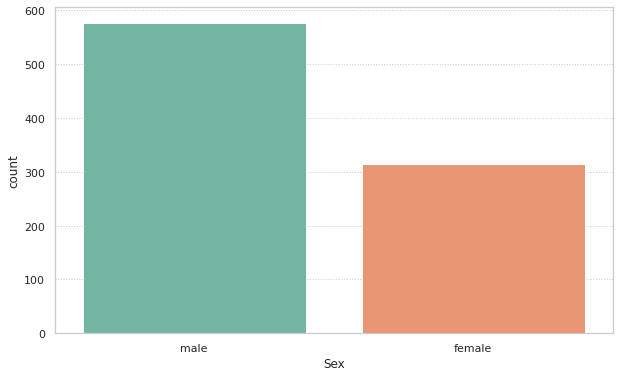

In [31]:
g = sns.countplot(data=df_train, x='Sex', palette='Set2')

comp_gender = pd.DataFrame(columns=[['Count', '%']])
comp_gender['Count'] = df_train['Sex'].value_counts()
comp_gender['%'] = round(df_train['Sex'].value_counts()*100/len(df_train), 2)
                             
comp_gender

,Count,%
S,644,72.28
C,168,18.86
Q,77,8.64


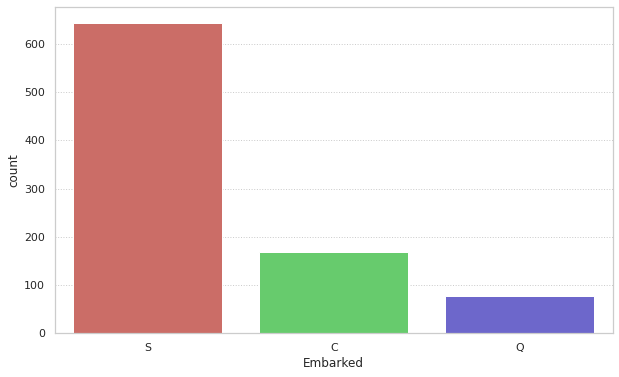

In [32]:
g = sns.countplot(data=df_train, x='Embarked', palette='hls')

comp_embarked = pd.DataFrame(columns=[['Count', '%']])
comp_embarked['Count'] = df_train['Embarked'].value_counts()
comp_embarked['%'] = round(df_train['Embarked'].value_counts()*100/len(df_train), 2)
                             
comp_embarked

,Count,%
0,608,68.24
1,209,23.46
2,28,3.14
4,18,2.02
3,16,1.80
8,7,0.79
5,5,0.56


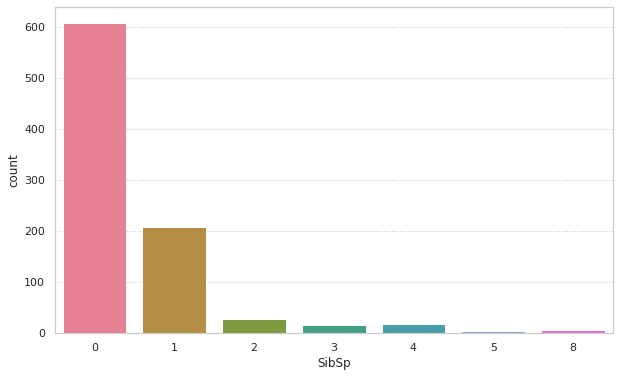

In [33]:
g = sns.countplot(data=df_train, x='SibSp', palette='husl')

comp_sib = pd.DataFrame(columns=[['Count', '%']])
comp_sib['Count'] = df_train['SibSp'].value_counts()
comp_sib['%'] = round(df_train['SibSp'].value_counts()*100/len(df_train), 2)
                             
comp_sib

,Count,%
0,678,76.09
1,118,13.24
2,80,8.98
5,5,0.56
3,5,0.56
4,4,0.45
6,1,0.11


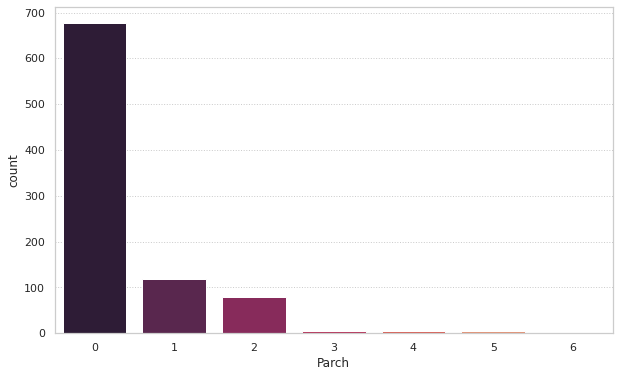

In [34]:
g = sns.countplot(data=df_train, x='Parch', palette='rocket')

comp_parch = pd.DataFrame(columns=[['Count', '%']])
comp_parch['Count'] = df_train['Parch'].value_counts()
comp_parch['%'] = round(df_train['Parch'].value_counts()*100/len(df_train), 2)
                             
comp_parch

## Bivariate Analysis

In [35]:
import plotly.express as px

fig = px.histogram(df_train, 
                   x='Survived', 
                   color='Sex',
                   color_discrete_sequence=['grey', 'orange'],
                   title='Count of Survival by Sex')
fig.update_layout(bargap=0.1)
fig.show()

In [36]:
fig = px.histogram(df_train, 
                   x='Pclass',
                   color='Survived',
                   color_discrete_sequence=['grey', 'orange'],
                   title='Count of Pclass by Survival')
fig.update_layout(bargap=0.1)
fig.show()

In [37]:
fig = px.histogram(df_train, 
                   x='Pclass',
                   color='Sex',
                   color_discrete_sequence=['skyblue', 'pink'],
                   title='Count of Pclass by Sex')
fig.update_layout(bargap=0.1)
fig.show()

In [38]:
fig = px.histogram(df_train, 
                   x='Embarked',
                   color='Sex',
                   color_discrete_sequence=['skyblue', 'pink'],
                   title='Count of Embarked by Sex')
fig.update_layout(bargap=0.1)
fig.show()

In [39]:
fig = px.histogram(df_train, 
                   x='Embarked',
                   color='Survived',
                   color_discrete_sequence=['grey', 'orange'],
                   title='Count of Embarked by Survived')
fig.update_layout(bargap=0.1)
fig.show()

In [40]:
fig = px.histogram(df_train, 
                   x='SibSp',
                   nbins=36,
                   color='Survived',
                   color_discrete_sequence=['grey', 'orange'],
                   title='Count of SibSp by Survived')
fig.update_layout(bargap=0.1)
fig.show()

In [41]:
fig = px.histogram(df_train, 
                   x='SibSp',
                   nbins=36,
                   color='Sex',
                   color_discrete_sequence=['blue', 'pink'],
                   title='Count of SibSp by Sex')
fig.update_layout(bargap=0.1)
fig.show()

In [42]:
fig = px.histogram(df_train, 
                   x='SibSp',
                   nbins=36,
                   color='Pclass',
                   color_discrete_sequence=['#CCD1D1', '#D2B4DE', '#A2D9CE'],
                   title='Count of SibSp by Pclass')
fig.update_layout(bargap=0.1)
fig.show()

In [43]:
fig = px.histogram(df_train, 
                   x='Parch',
                   nbins=36,
                   color='Survived',
                   color_discrete_sequence=['grey', 'orange'],
                   title='Count of Parch by Survived')
fig.update_layout(bargap=0.1)
fig.show()

In [44]:
fig = px.histogram(df_train, 
                   x='Parch',
                   nbins=36,
                   color='Sex',
                   color_discrete_sequence=['blue', 'pink'],
                   title='Count of Parch by Sex')
fig.update_layout(bargap=0.1)
fig.show()

In [45]:
fig = px.histogram(df_train, 
                   x='Parch',
                   nbins=36,
                   color='Pclass',
                   color_discrete_sequence=['#CCD1D1', '#D2B4DE', '#A2D9CE'],
                   title='Count of Parch by Pclass')
fig.update_layout(bargap=0.1)
fig.show()

## Bivariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

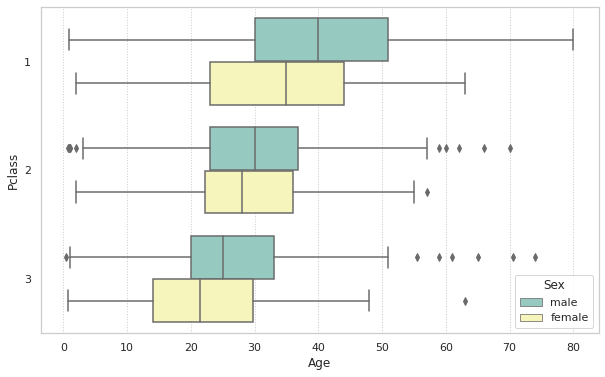

In [46]:
sns.boxplot(x='Age', y='Pclass', hue='Sex', data=df_train, order=None, 
            hue_order=None, orient='h', color=None, palette='Set3', 
            saturation=0.75, width=0.8, dodge=True, fliersize=5, 
            linewidth=None, whis=1.5, ax=None)

<AxesSubplot:xlabel='Age', ylabel='Embarked'>

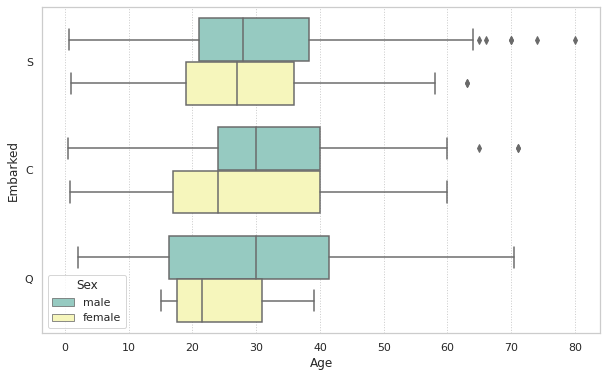

In [47]:
sns.boxplot(x='Age', y='Embarked', hue='Sex', data=df_train, order=None, 
            hue_order=None, orient='h', color=None, palette='Set3', 
            saturation=0.75, width=0.8, dodge=True, fliersize=5, 
            linewidth=None, whis=1.5, ax=None)

## Multivariate Analysis

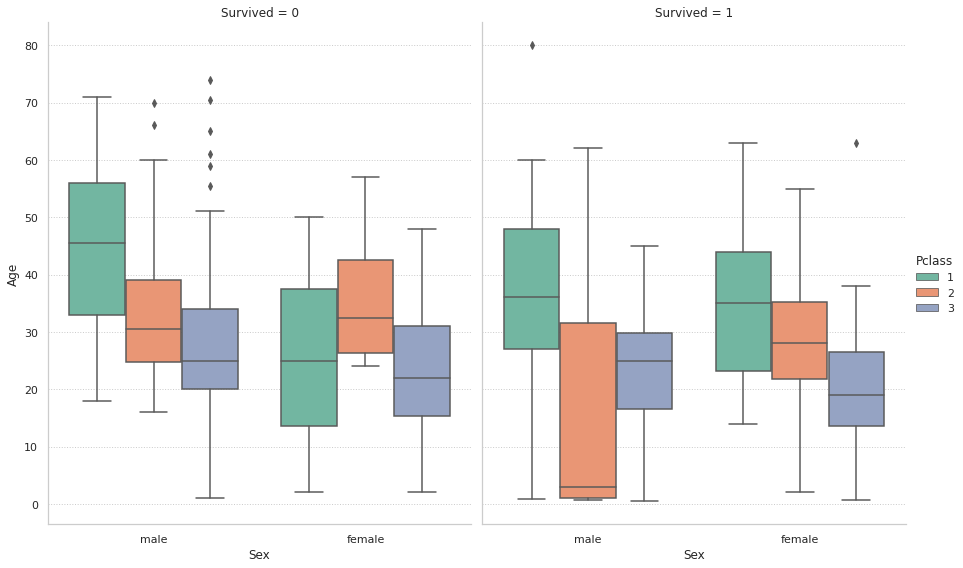

In [48]:
g = sns.catplot(x="Sex", y="Age", hue="Pclass", col="Survived",
                data=df_train, kind="box", height=8, aspect=.8, palette='Set2')

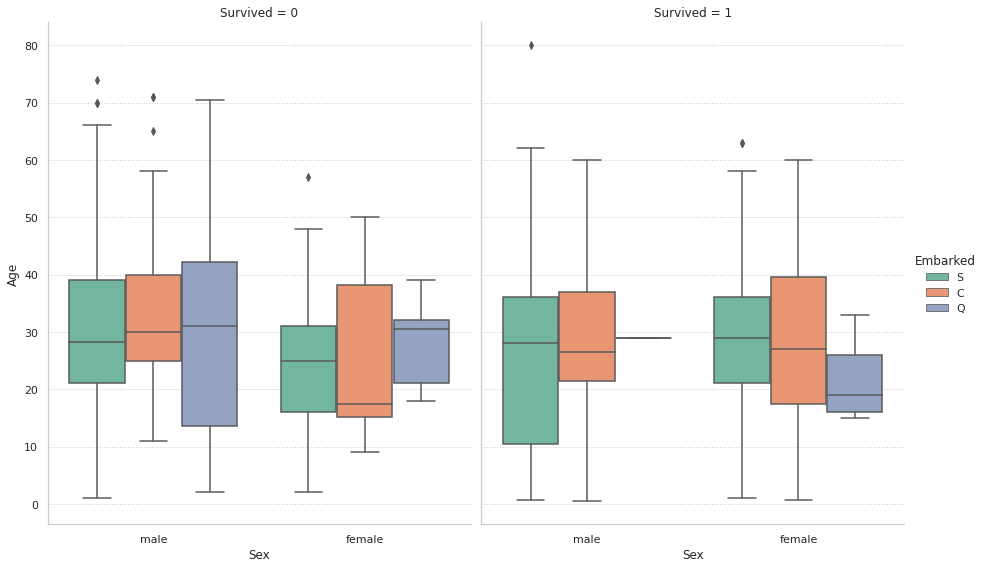

In [49]:
g = sns.catplot(x="Sex", y="Age", hue="Embarked", col="Survived",
                data=df_train, kind="box", height=8, aspect=.8, palette='Set2')

<AxesSubplot:>

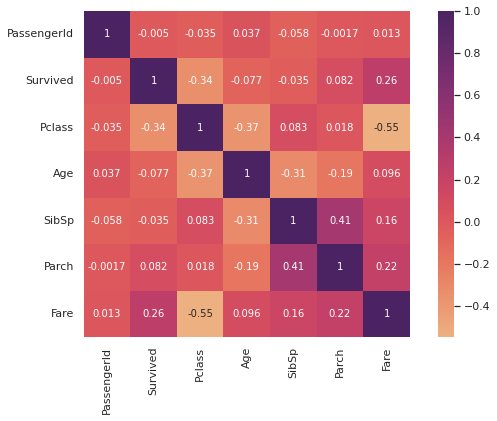

In [50]:
correlation = df_train.corr()

sns.heatmap(correlation, cmap='flare', square=True, annot=True)

### Segregating Numeric and Categorical Columns

In [51]:
numeric_df = combined_df[['Age', 'Fare']]

category_df = combined_df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]
category_df.head()

,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,1,0,S
1,1,female,1,0,C
2,3,female,0,0,S
3,1,female,1,0,S
4,3,male,0,0,S


## Label encoding categorical features

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

category_dummy_df = category_df.apply(le.fit_transform)
category_dummy_df.head()

,Pclass,Sex,SibSp,Parch,Embarked
0,2,1,1,0,2
1,0,0,1,0,0
2,2,0,0,0,2
3,0,0,1,0,2
4,2,1,0,0,2


## Normalizing Numerical Features

In [53]:
numeric_df['Age'] = np.log1p(numeric_df['Age'].astype('float64'))
numeric_df['Fare'] = np.log1p(numeric_df['Fare'].astype('float64'))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
clean_df = pd.concat([numeric_df, category_dummy_df], axis=1)
clean_df['Survived'] = combined_df['Survived']
clean_df.head()

,Age,Fare,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3.135494,2.110213,2,1,1,0,2,0
1,3.663562,4.280593,0,0,1,0,0,1
2,3.295837,2.188856,2,0,0,0,2,1
3,3.583519,3.990834,0,0,1,0,2,1
4,3.583519,2.202765,2,1,0,0,2,0


In [55]:
df_train = clean_df.iloc[:891, :]
df_test = clean_df.iloc[891:, :]

df_test.drop(['Survived'], axis=1, inplace=True)
df_test.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,Fare,Pclass,Sex,SibSp,Parch,Embarked
0,3.569533,2.178064,2,1,0,0,1
1,3.871201,2.079442,2,0,1,0,2
2,4.143135,2.369075,1,1,0,0,1
3,3.332205,2.268252,2,1,0,0,2
4,3.135494,2.586824,2,0,1,1,2


## Splitting the train and test data sets

In [56]:
X = df_train.drop(['Survived'], axis=1)
y = df_train['Survived']

X.shape, y.shape

((891, 7), (891,))

In [57]:
y = y.astype('int64')

## Build Model (Logistic Regression)

In [58]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
Log_reg_model = log_reg.fit(X, y)

## Predict Model (Logistic Regression)

In [59]:
y_pred_log_reg = log_reg.predict(df_test)

Log_reg_model.score(X, y)

0.8114478114478114

In [60]:
'''prediction_df = pd.DataFrame(y_pred_log_reg)
sample_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission_df = pd.concat([sample_df['PassengerId'], prediction_df], axis=1)
submission_df.columns  = ['PassengerId', 'Survived']
submission_df.to_csv('gender_submission.csv', index=False)'''

"prediction_df = pd.DataFrame(y_pred_log_reg)\nsample_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')\nsubmission_df = pd.concat([sample_df['PassengerId'], prediction_df], axis=1)\nsubmission_df.columns  = ['PassengerId', 'Survived']\nsubmission_df.to_csv('gender_submission.csv', index=False)"

## Build Model (Naive Bayes)

In [61]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model = gnb.fit(X, y)

## Predict Model (Naive Bayes)

In [62]:
y_pred_gnb = gnb_model.predict(df_test)

gnb_model.score(X, y)

0.792368125701459

## Build Model - (Random Forest Classifier)

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier(n_estimators=100)

rfc_model = rfc_clf.fit(X, y)

## Predict Model (Random Forest Classifier)

In [64]:
y_pred_rfc = rfc_model.predict(df_test)

rfc_model.score(X, y)

0.9820426487093153

In [65]:
'''prediction_df = pd.DataFrame(y_pred_rfc)
sample_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission_df = pd.concat([sample_df['PassengerId'], prediction_df], axis=1)
submission_df.columns  = ['PassengerId', 'Survived']
submission_df.to_csv('gender_submission.csv', index=False)'''

"prediction_df = pd.DataFrame(y_pred_rfc)\nsample_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')\nsubmission_df = pd.concat([sample_df['PassengerId'], prediction_df], axis=1)\nsubmission_df.columns  = ['PassengerId', 'Survived']\nsubmission_df.to_csv('gender_submission.csv', index=False)"

## Build Model (Decision Tree Classifier)

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

dt_model = dt_clf.fit(X, y)

## Predict Model (Decision Tree Classifier)

In [67]:
y_pred_dt = dt_model.predict(df_test)

dt_model.score(X, y)

0.9820426487093153

In [68]:
'''prediction_df = pd.DataFrame(y_pred_dt)
sample_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission_df = pd.concat([sample_df['PassengerId'], prediction_df], axis=1)
submission_df.columns  = ['PassengerId', 'Survived']
submission_df.to_csv('gender_submission.csv', index=False)'''

"prediction_df = pd.DataFrame(y_pred_dt)\nsample_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')\nsubmission_df = pd.concat([sample_df['PassengerId'], prediction_df], axis=1)\nsubmission_df.columns  = ['PassengerId', 'Survived']\nsubmission_df.to_csv('gender_submission.csv', index=False)"

## Build Model KNN Classifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn_model = knn.fit(X, y)

In [70]:
y_pred_knn = knn_model.predict(df_test)

knn_model.score(X, y)

0.8608305274971941

In [71]:
'''prediction_df = pd.DataFrame(y_pred_knn)
sample_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission_df = pd.concat([sample_df['PassengerId'], prediction_df], axis=1)
submission_df.columns  = ['PassengerId', 'Survived']
submission_df.to_csv('gender_submission.csv', index=False)'''

"prediction_df = pd.DataFrame(y_pred_knn)\nsample_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')\nsubmission_df = pd.concat([sample_df['PassengerId'], prediction_df], axis=1)\nsubmission_df.columns  = ['PassengerId', 'Survived']\nsubmission_df.to_csv('gender_submission.csv', index=False)"

## Build Model SVM Classifier 'rbf'

In [72]:
from sklearn import svm
svm_clf = svm.SVC(kernel='rbf',C=0.3,gamma=0.3)
svm_model = svm_clf.fit(X, y)

In [73]:
y_pred_svm = svm_model.predict(df_test)

svm_model.score(X, y)

0.8338945005611672

In [74]:
'''prediction_df = pd.DataFrame(y_pred_svm)
sample_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission_df = pd.concat([sample_df['PassengerId'], prediction_df], axis=1)
submission_df.columns  = ['PassengerId', 'Survived']
submission_df.to_csv('gender_submission.csv', index=False)'''

"prediction_df = pd.DataFrame(y_pred_svm)\nsample_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')\nsubmission_df = pd.concat([sample_df['PassengerId'], prediction_df], axis=1)\nsubmission_df.columns  = ['PassengerId', 'Survived']\nsubmission_df.to_csv('gender_submission.csv', index=False)"

## Build Model SVM 'linear'

In [75]:
svm_clf_lin = svm.SVC(kernel='linear')
svm_model_lin = svm_clf_lin.fit(X, y)

In [76]:
y_pred_svm_lin = svm_model_lin.predict(df_test)

svm_model_lin.score(X, y)

0.7867564534231201

In [77]:
'''prediction_df = pd.DataFrame(y_pred_svm_lin)
sample_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission_df = pd.concat([sample_df['PassengerId'], prediction_df], axis=1)
submission_df.columns  = ['PassengerId', 'Survived']
submission_df.to_csv('gender_submission.csv', index=False)'''

"prediction_df = pd.DataFrame(y_pred_svm_lin)\nsample_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')\nsubmission_df = pd.concat([sample_df['PassengerId'], prediction_df], axis=1)\nsubmission_df.columns  = ['PassengerId', 'Survived']\nsubmission_df.to_csv('gender_submission.csv', index=False)"

## Cross Validation

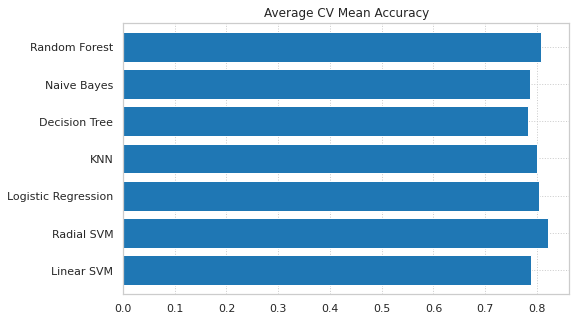

In [78]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
kfold = KFold(n_splits=10, random_state=None)

xyz = []
accuracy = []
std = []
classifiers = ['Linear SVM', 'Radial SVM', 'Logistic Regression', 
               'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']

models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), 
          KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), 
          RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    CV_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## Confustion Matrix

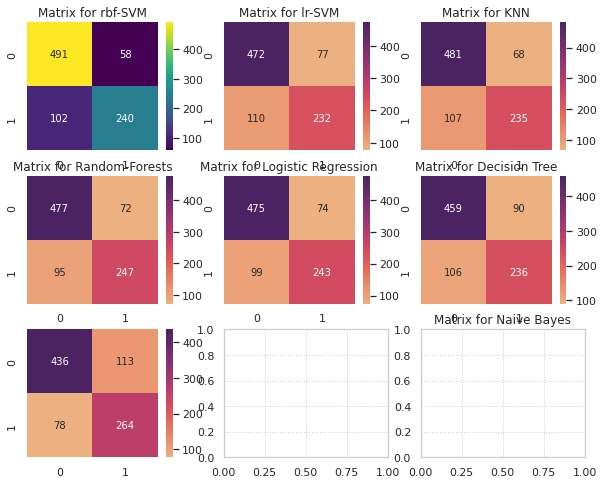

In [79]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(3, 3, figsize=(10, 8))

y_pred_svm_rbf = cross_val_predict(svm.SVC(kernel='rbf'), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred_svm_rbf), 
            ax=ax[0, 0], 
            annot=True, 
            fmt='2.0f', 
            cmap='viridis')
ax[0, 0].set_title('Matrix for rbf-SVM')

y_pred_svm_lr = cross_val_predict(svm.SVC(kernel='linear'), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred_svm_lr), 
            ax=ax[0, 1], 
            annot=True, 
            fmt='2.0f', 
            cmap='flare')
ax[0, 1].set_title('Matrix for lr-SVM')

y_pred_knn = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred_knn), 
            ax=ax[0, 2], 
            annot=True, 
            fmt='2.0f', 
            cmap='flare')
ax[0, 2].set_title('Matrix for KNN')

y_pred_rfc = cross_val_predict(RandomForestClassifier(n_estimators=100), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred_rfc), 
            ax=ax[1, 0], 
            annot=True, 
            fmt='2.0f', 
            cmap='flare')
ax[1, 0].set_title('Matrix for Random-Forests')

y_pred_log_reg = cross_val_predict(LogisticRegression(), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred_log_reg), 
            ax=ax[1, 1], 
            annot=True, 
            fmt='2.0f', 
            cmap='flare')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred_dt = cross_val_predict(DecisionTreeClassifier(), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred_dt), 
            ax=ax[1,2], 
            annot=True, 
            fmt='2.0f', 
            cmap='flare')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred_nb = cross_val_predict(GaussianNB(),X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred_nb), 
            ax=ax[2,0], 
            annot=True, 
            fmt='2.0f', 
            cmap='flare')
ax[2,2].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()


## Hyper Parameter Tuning

### SVM

In [80]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,y)
print("Best Score: ", gd.best_score_)
print("Best Estimator: ", gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Score:  0.8249074132195091
Best Estimator:  SVC(C=0.3, gamma=0.3)


### Random Forest

In [81]:
n_estimators=range(100,1000,10000)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0), 
                param_grid=hyper, 
                verbose=True)
gd.fit(X,y)
print("Best Score: ", gd.best_score_)
print("Best Estimator: ", gd.best_estimator_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Score:  0.8125918021467579
Best Estimator:  RandomForestClassifier(random_state=0)
